# Úkol č. 2 - regrese

- **Deadline je do 4. 12. 2022, 23:59:59**, pokud odevzdáte úkol do 11. 12. 2022, 23:59:59, budete penalizování -4 body, pozdější odevzdání je bez bodu.
- V rámci tohoto úkolu se musíte vypořádat s problematikou regrese a hledání optimálních hyperparametrů.

> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

- Zdrojem dat je soubor `LifeExpectancyData.csv` (originál zde: https://www.kaggle.com/kumarajarshi/life-expectancy-who).
- Popis datasetu najdete na uvedené stránce s originálem datasetu.
- Cílová (vysvětlovaná) proměnná se jmenuje `Life expectancy `.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **16 bodů**:

- Odeberte z datasetu datové body, u kterých neznáte vysvětlovanou proměnnou.
- Rozdělte data na vhodné podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
- Proveďte základní průzkum dat a svá pozorování diskutujte. Na jeho základě adekvátně reagujte na problematické věci v datech (chybějící hodnoty, atd.) a vysvětlete motivaci k provedeným krokům.
- Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:

  - K měření chyby použijte MAE (mean absolute error) a RMSE (root mean squared error).

- Zkoumejte, jak byste mohli modely vylepšit:
  - Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
  - Experimentujte se standardizací/normalizací dat.
  - Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
  - Získané výsledky vždy řádně okomentujte.
- Použijte i jiné modely (alespoň jeden) probírané v předmětu BI-ML1 či i jiné, pokud víte, jak fungují.
- Nakonec vyberte nejlepší model (vzhledem k RMSE) a odhadněte, jakou RMSE a MAE můžete očekávat na nových datech, která jste doposud neměli k dispozici.

## Poznámky k odevzdání

- Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.
- Opravující Vám ve výjimečných případech může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale stěžejní a má hlavní vliv na hodnocení.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso

import sklearn.metrics as metrics
from scipy import optimize

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('dark_background')


Let's take a look at the dataset. There are 16 entries for each country ranging from 2000 to 2015

In [2]:
df = pd.read_csv("LifeExpectancyData.csv")
display(df.head(16))
df.info()
display(df.isnull().sum())
print(df.columns)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


Get rid of extra white spaces


In [3]:
df = df.rename(columns={"Life expectancy ": "Life expectancy",
                        "Measles ": "Measles",
                        " BMI ":  "BMI",
                        "under-five deaths ": "under-five deaths",
                        "Diphtheria ": "Diphtheria",
                        " HIV/AIDS": "HIV/AIDS",
                        " thinness  1-19 years": "thinness 1-19 years",
                        " thinness 5-9 years": "thinness 5-9 years",
                        })


Get rid of rows where I don't know the target variable


In [4]:
df = df[~df["Life expectancy"].isnull()]
display(df.isnull().sum())


Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness 1-19 years                 32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

Converting status to 0/1

In [5]:
df.Status = df.Status.replace({"Developing": 0, "Developed": 1})

Some data are randomly shifted by an order of magnitude or even two, it would be preferable to fix that, but I would need to check it for every country in almost every column first and then fix the values that I *know* are wrong. If we take a look at Afghanistan, only 6 out of 16 values of the population are bigger than 3 million, which is really sad since the values should be between 20 and 35 million. In conclusion, I won't be touching that, even tho it hurts.

In [6]:
df.loc[(df["Country"] == "Afghanistan") & (df["Population"] >= 3_000_000)]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
8,Afghanistan,2007,0,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
11,Afghanistan,2004,0,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
13,Afghanistan,2002,0,56.2,3.0,88,0.01,16.887351,64.0,2486,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2


Take a look at the correlations

<AxesSubplot: >

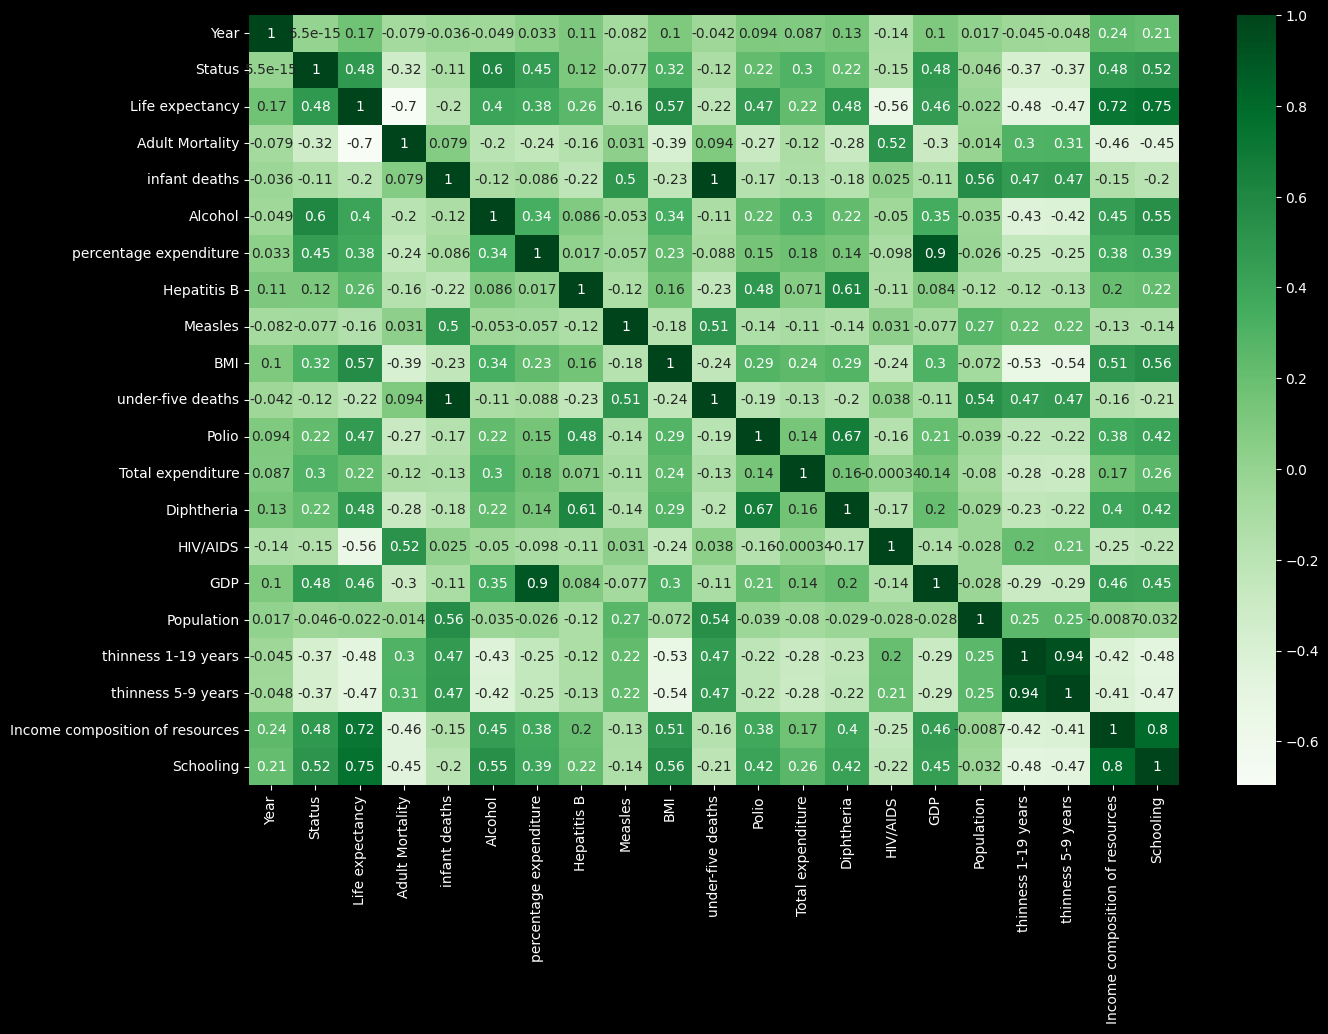

In [7]:
corr_m = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_m, annot=True, cmap="Greens")


If there is a big correlation, we can combine those columns. I use anything that has more than |0.8|

In [8]:
df["Infant deaths"] = df.pop("infant deaths") # since the correlation is 1 I use only one of the columns
df.pop("under-five deaths")
df["GDP + percentage expenditure"] = df.pop("GDP") + df.pop("percentage expenditure")
df["Diphtheria + Polio"] = df.pop("Diphtheria") + df.pop("Polio")
df["Thinness 1-19 years"] = df.pop("thinness 1-19 years") + df.pop("thinness 5-9 years")

From this graph, we can see that developed countries have a median higher by 10 years, and life expectancy is overall more clustered around it.

In [9]:
px.violin(df, x='Status', y='Life expectancy', color='Status', template='plotly_dark',
          box=True, title='Life expectancy Based on Countries status', width=1500, height=800)


Using dummies for each country

In [10]:
Country_dummy=pd.get_dummies(df['Country'])
df.drop(columns="Country", inplace=True)
df = pd.concat([df, Country_dummy], axis=1)

In [11]:
ydata = df["Life expectancy"]
Xdata = df.drop("Life expectancy", axis = 1)

Let's split the dataset

In [12]:
rd_seed = 420
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed)
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed) 
print(f"Train dimension, X: {Xtrain.shape}, y: {ytrain.shape}")
print(f"Val dimension, X: {Xval.shape}, y: {yval.shape}")
print(f"Test dimension, X: {Xtest.shape}, y: {ytest.shape}")

Train dimension, X: (1756, 199), y: (1756,)
Val dimension, X: (586, 199), y: (586,)
Test dimension, X: (586, 199), y: (586,)


In [13]:
def fill(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            col_med = df[col].mean()
            df[col] = df[col].fillna(col_med)
    return df

Fill in Null values in each dataset. It would be much better to use correlated columns to calculate/predict what the values would be, e.g. fill out GDP based on percentage expenditure, but since I already merged those columns, I'm just using the interpolate function. Also sometimes there is just 0 in the dataset instead of some kind of None, but, same as for the shifted values, I would need to look at each of the values separately, because what if it could really be 0

In [14]:
dfs = [Xtrain, Xtest, Xval]
for x in dfs:
    x = fill(x)



<a id='lin_reg'></a>

First, let's use linear regression. The values already aren't bad

In [15]:
clf = LinearRegression()
clf.fit(Xtrain,ytrain)

val_pred = clf.predict(Xval)
print('Val RMSE:', metrics.mean_squared_error(yval, val_pred, squared=False))
print('Val MAE:', metrics.mean_absolute_error(yval, val_pred))
print('Val R2:', metrics.r2_score(yval, val_pred))

test_pred = clf.predict(Xtest)
print('\nTest RMSE:', metrics.mean_squared_error(ytest, test_pred, squared=False))
print('Test MAE:', metrics.mean_absolute_error(ytest, test_pred))
print('Test R2:', metrics.r2_score(ytest, test_pred))

Val RMSE: 1.7097297204086601
Val MAE: 1.101213282483399
Val R2: 0.9654005149821784

Test RMSE: 2.121876775864546
Test MAE: 1.2675683744110846
Test R2: 0.9501764781399233


Now for ridge. Without any scaling or tuning, it's not bad, but we can improve this

In [16]:
clf = Ridge()
clf.fit(Xtrain,ytrain)

val_pred = clf.predict(Xval)
print('Val RMSE:', metrics.mean_squared_error(yval, val_pred, squared=False))
print('Val MAE:', metrics.mean_absolute_error(yval, val_pred))
print('Val R2:', metrics.r2_score(yval, val_pred))

test_pred = clf.predict(Xtest)
print('\nTest RMSE:', metrics.mean_squared_error(ytest, test_pred, squared=False))
print('Test MAE:', metrics.mean_absolute_error(ytest, test_pred))
print('Test R2:', metrics.r2_score(ytest, test_pred))

Val RMSE: 2.15978728089738
Val MAE: 1.4049225272088777
Val R2: 0.9447875942393632

Test RMSE: 2.3227507311400344
Test MAE: 1.505735659715386
Test R2: 0.9402965654878913


C:\Users\Brumda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=1.45574e-19): result may not be accurate.



Even the program is telling me, that I should scale the data, so let's do it

In [17]:
scaler = StandardScaler().fit(Xtrain)

Xtrain_sc = scaler.transform(Xtrain)
Xval_sc = scaler.transform(Xval)
Xtest_sc = scaler.transform(Xtest)

I can try linear regression again, but scaling shouldn't have done anything and as expected, it didn't make much of a difference, it got even slightly worse

In [18]:
clf = LinearRegression()
clf.fit(Xtrain_sc,ytrain)

val_pred = clf.predict(Xval_sc)
print('Val RMSE:', metrics.mean_squared_error(yval, val_pred, squared=False))
print('Val MAE:', metrics.mean_absolute_error(yval, val_pred))
print('Val R2:', metrics.r2_score(yval, val_pred))

test_pred = clf.predict(Xtest_sc)
print('\nTest RMSE:', metrics.mean_squared_error(ytest, test_pred, squared=False))
print('Test MAE:', metrics.mean_absolute_error(ytest, test_pred))
print('Test R2:', metrics.r2_score(ytest, test_pred))

Val RMSE: 1.7094390905855295
Val MAE: 1.100706414874635
Val R2: 0.9654122768266767

Test RMSE: 2.1217318334222077
Test MAE: 1.2672253764848758
Test R2: 0.9501832846579829


Ridge is now almost the same as linear regression

In [19]:
clf = Ridge()
clf.fit(Xtrain_sc,ytrain)

val_pred = clf.predict(Xval_sc)
print('Val RMSE:', metrics.mean_squared_error(yval, val_pred, squared=False))
print('Val MAE:', metrics.mean_absolute_error(yval, val_pred))
print('Val R2:', metrics.r2_score(yval, val_pred))

test_pred = clf.predict(Xtest_sc)
print('\nTest RMSE:', metrics.mean_squared_error(ytest, test_pred, squared=False))
print('Test MAE:', metrics.mean_absolute_error(ytest, test_pred))
print('Test R2:', metrics.r2_score(ytest, test_pred))

Val RMSE: 1.7115306728337714
Val MAE: 1.1020543532482365
Val R2: 0.9653275855079464

Test RMSE: 2.121939145320352
Test MAE: 1.2679764726858185
Test R2: 0.9501735491181725


Let's try finding the best alpha for ridge

In [20]:
def get_opt_ridge_model(train, val):
        def ridgemodel_eval(alpha):   # Function that tries ridge with provided alpha and returns its RMSE
                clf = Ridge(alpha=alpha)
                clf.fit(train, ytrain)
                return metrics.mean_squared_error(yval, clf.predict(val), squared = False)

        opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 50}, method = 'bounded', bounds=(0.01, 0.5)) # tries 50 different alphas between 0.1 and 0.5, returns the one with the smallest RMSE
        print(opt_alpha)
        clf_opt_ridge = Ridge(alpha = opt_alpha.x)
        clf_opt_ridge.fit(train, ytrain)
        return clf_opt_ridge

It helped only a little

In [21]:
clf_opt_ridge = get_opt_ridge_model(Xtrain_sc, Xval_sc)

val_opt_pred = clf_opt_ridge.predict(Xval_sc)
print('\nVal RMSE:', metrics.mean_squared_error(yval, val_opt_pred, squared = False))
print('Val MAE:', metrics.mean_absolute_error(yval, val_opt_pred))
print('Val R2:', metrics.r2_score(yval, val_opt_pred))

test_opt_pred = clf_opt_ridge.predict(Xtest_sc)
print('\nTest RMSE:', metrics.mean_squared_error(ytest, test_opt_pred, squared = False))
print('Test MAE:', metrics.mean_absolute_error(ytest, test_opt_pred))
print('Test R2:', metrics.r2_score(ytest, test_opt_pred))

     fun: 1.7097471389869665
 message: 'Solution found.'
    nfev: 24
     nit: 24
  status: 0
 success: True
       x: 0.010004313329195127

Val RMSE: 1.7097471389869665
Val MAE: 1.1012213626988314
Val R2: 0.965399809985474

Test RMSE: 2.12187691271269
Test MAE: 1.2675693224576512
Test R2: 0.9501764717132949


Let's try lasso

In [22]:
lasso = Lasso()
lasso.fit(Xtrain,ytrain)

val_pred = lasso.predict(Xval)
print('Val RMSE:', metrics.mean_squared_error(yval, val_pred, squared=False))
print('Val MAE:', metrics.mean_absolute_error(yval, val_pred))
print('Val R2:', metrics.r2_score(yval, val_pred))

test_pred = lasso.predict(Xtest)
print('\nTest RMSE:', metrics.mean_squared_error(ytest, test_pred, squared=False))
print('Test MAE:', metrics.mean_absolute_error(ytest, test_pred))
print('Test R2:', metrics.r2_score(ytest, test_pred))

Val RMSE: 4.212583325794516
Val MAE: 3.0836474201044037
Val R2: 0.7899553030506387

Test RMSE: 4.205408894071694
Test MAE: 3.1703598330929914
Test R2: 0.8042911062963012


Right now it's very bad and even scaling doesn't help, it actually makes it worse

In [23]:
lasso = Lasso()
lasso.fit(Xtrain_sc,ytrain)

val_pred = lasso.predict(Xval_sc)
print('Val RMSE:', metrics.mean_squared_error(yval, val_pred, squared=False))
print('Val MAE:', metrics.mean_absolute_error(yval, val_pred))
print('Val R2:', metrics.r2_score(yval, val_pred))

test_pred = lasso.predict(Xtest_sc)
print('\nTest RMSE:', metrics.mean_squared_error(ytest, test_pred, squared=False))
print('Test MAE:', metrics.mean_absolute_error(ytest, test_pred))
print('Test R2:', metrics.r2_score(ytest, test_pred))

Val RMSE: 4.443742686374315
Val MAE: 3.1951354524405238
Val R2: 0.7662710440716134

Test RMSE: 4.387319347070347
Test MAE: 3.2141252136026375
Test R2: 0.786993626326975


Let's use the same function for finding optimal alpha as before for ridge

In [24]:
def get_opt_lasso_model(train, val):
        def lassomodel_eval(alpha):   # Function that tries lasso with provided alpha and returns its RMSE
                clf = Lasso(alpha=alpha)
                clf.fit(train, ytrain)
                return metrics.mean_squared_error(yval, clf.predict(val), squared = False)

        opt_alpha = optimize.minimize_scalar(lassomodel_eval, method = 'bounded', bounds=(0.01, 2))
        print(opt_alpha)
        clf_opt_lasso = Lasso(alpha = opt_alpha.x)
        clf_opt_lasso.fit(train, ytrain)
        return clf_opt_lasso

For data that weren't scaled, it's still 2 times worse than ridge or linear regression

In [25]:
clf_opt_lasso = get_opt_lasso_model(Xtrain, Xval)

val_opt_pred = clf_opt_lasso.predict(Xval)
print('\nVal RMSE:', metrics.mean_squared_error(yval, val_opt_pred, squared = False))
print('Val MAE:', metrics.mean_absolute_error(yval, val_opt_pred))
print('Val R2:', metrics.r2_score(yval, val_opt_pred))

test_opt_pred = clf_opt_lasso.predict(Xtest)
print('\nTest RMSE:', metrics.mean_squared_error(ytest, test_opt_pred, squared = False))
print('Test MAE:', metrics.mean_absolute_error(ytest, test_opt_pred))
print('Test R2:', metrics.r2_score(ytest, test_opt_pred))

     fun: 3.142217023515821
 message: 'Solution found.'
    nfev: 27
     nit: 27
  status: 0
 success: True
       x: 0.01000399770747084

Val RMSE: 3.142217023515821
Val MAE: 2.274936853810885
Val R2: 0.883134299449912

Test RMSE: 3.0547664564780384
Test MAE: 2.2951919879901155
Test R2: 0.896735717828844


Using scaled data yields similar results

In [26]:
clf_opt_lasso = get_opt_lasso_model(Xtrain_sc, Xval_sc)

val_opt_pred = clf_opt_lasso.predict(Xval_sc)
print('\nVal RMSE:', metrics.mean_squared_error(yval, val_opt_pred, squared = False))
print('Val MAE:', metrics.mean_absolute_error(yval, val_opt_pred))
print('Val R2:', metrics.r2_score(yval, val_opt_pred))

test_opt_pred = clf_opt_lasso.predict(Xtest_sc)
print('\nTest RMSE:', metrics.mean_squared_error(ytest, test_opt_pred, squared = False))
print('Test MAE:', metrics.mean_absolute_error(ytest, test_opt_pred))
print('Test R2:', metrics.r2_score(ytest, test_opt_pred))

     fun: 1.7870000104368744
 message: 'Solution found.'
    nfev: 27
     nit: 27
  status: 0
 success: True
       x: 0.01000399770747084

Val RMSE: 1.7870000104368744
Val MAE: 1.1428494490702328
Val R2: 0.9622024350005215

Test RMSE: 2.1403067474607154
Test MAE: 1.2931177986088436
Test R2: 0.9493072156970599


With my data preparation linear regression has the best RMSE, all the values are already listed [here](#lin_reg) as the Test versions. On new data, we could expect approximately RMSE = 2.1119 and MAE = 1.2596